In [1]:
using Plots
using LaTeXStrings
using LinearAlgebra
using ForwardDiff

# O problema de Interpolação

Em algumas situações é possível que conheçamos uma função $f: [a, b] \rightarrow
\mathbb{R}$ em alguns pontos apenas. Isso pode ocorrer, por exemplo, porque o
custo para computá-la é muito elevado. Como quando a função é resultado de uma
sequência longa de operações computacionais envolvendo simulações de fenômenos
complexos. Ou quando a função é obtida experimentalmente. Uma pergunta natural é
se é possível, de alguma forma razoável, extrapolar essa informação para todo o
intervalo de interesse.

Infelizmente esse problema é muito vago. De fato considere o problema de
aproximar a função seno conhecendo os seus valores nos ângulos notáveis.

| $x$       | $0$ | $\frac{\pi}{4}$      | $\frac{\pi}{3}$      | $\frac{\pi}{2}$ |
| --------- | --- | -------------------- | -------------------- | --------------- |
| $\sin(x)$ | $0$ | $\frac{\sqrt{2}}{2}$ | $\frac{\sqrt{3}}{2}$ | $1$             |

Veja o gráfico da função abaixo com os pontos tabelados destacados.

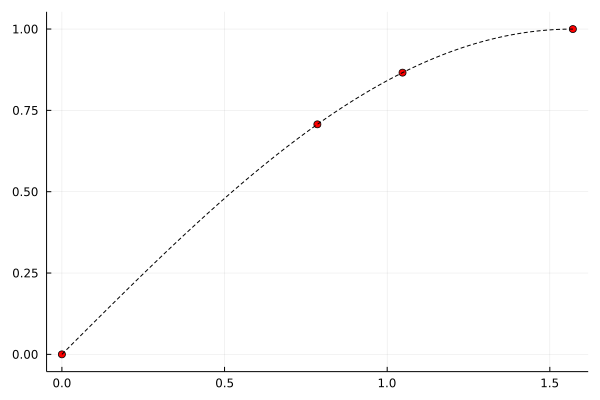

In [2]:
# Dados
angulos = [0, π/4, π/3, π/2]

# Plota o gráfico de seno usando 1000 pontos.
x = range(0, π/2, length = 100)
scatter(angulos, sin.(angulos), color = :red, label = "", ratio = 1)
plot!(x, sin.(x), linestyle = :dash, color = :black, label = "")

Nesse caso é claro que, além da função seno, há múltiplas (infinitas) funções,
contínuas ou não, que passam pelos pontos vermelhos. Veja outro exemplo:


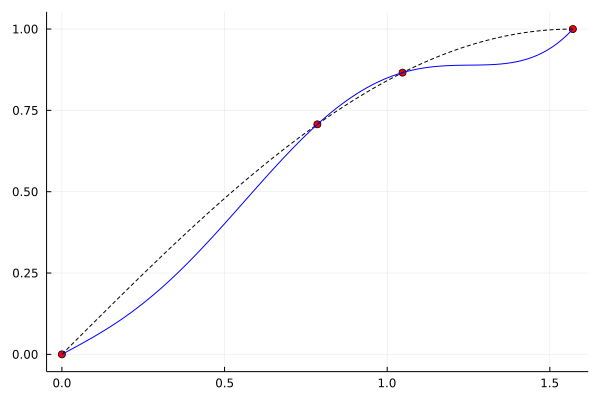

In [3]:
function f(x)
    # Depois de ler o texto todo volte aqui e pense como gerei essa
    # função.
    num1 = sin(π/4)*cos(x - π/2)*cos(x + π/6)*cos(x)  
    den1 = cos(π/4 - π/2)*cos(π/4 + π/6)*cos(π/4)
    num2 = sin(π/3)*cos(x - π/2)*cos(x + π/4)*cos(x) 
    den2 = cos(π/3 - π/2)*cos(π/3 + π/4)*cos(π/3)
    num3 = sin(π/2)*x*(x - π/4)*(x - π/3) 
    den3 = π/2*π/4*π/6 
    return num1 / den1 + num2 / den2 + num3 / den3
end

plot!(x, f.(x), color = :blue, label = "")

O nosso desejo, entretanto, é buscar uma função que seja "bem comportada", que
possua expressão simples, que não possua variações bruscas.

Uma das maneiras de controlar a complexidade das funções que podemos usar na
aproximação é definir uma classe de funções de trabalho, que sejam bem
conhecidas e possuam boas propriedades. Um das classes de funções bem
comportadas e que são fáceis de calcular são as funções polinomiais. Isso nos
leva ao problema.

### Definição: Interpolação Polinomial

Dado um conjunto de pares 
$(x_i, y_i) \in \mathbb{R} \times \mathbb{R}, i = 0, \ldots, n$, 
com as abcissas todas distintas, desejamos encontrar um polinômio
$p$, tal que $p(x_i) = y_i,\ i = 0, \ldots, n$.

Esse problema é bem mais simples e bem definido do que o problema aberto de
encontrar uma função qualquer que passa pelos pontos. Para entender como
resolvê-la vamos começar com um exemplo com números simples e tentar resolvê-lo.
Vamos tentar achar um polinômio coincida com os valores dados na tabela

| $x$ | -1 | 2 | 3 |
|-----|----|---|---|
| $y$ | 6  | 3 |10 |

Uma primeira pergunta é qual é o grau do polinômio desejado. Como temos o valor
do polinômio em três pontos, é natural considerar um polinômio de grau 2, que
possui três coeficientes a determinar. Ou seja um polinômio na forma
$$p(x) = c_0 + c_1 x + c_2 x^2$$
Agora, dizer que esse polinômio passa pelos pontos na tabela é dizer que
\begin{align*}
c_0 + c_1 (-1) + c_2 (-1)^2 &= p(-1) = 6\\
c_0 + c_1 2 + c_2 2^2 &= p(2) = 3 \\
c_0 + c_1 3 + c_2 3^2 &= p(3) = 10.
\end{align*}
Note que ocorreu algo análogo ao que ocorria no problema de quadrados mínimos.
Recaímos em um sistema linear.
$$\left\{
\begin{matrix}
c_0 & - c_1   & + c_2   &= 6\\
c_0 & + 2 c_1 & + 4 c_2 &= 3 \\
c_0 & + 3 c_1 & + 9 c_2 &= 10.
\end{matrix}
\right.$$
De fato, podemos esquematizar o sistema com os dados da tabela vendo de maneira
ainda mais clara de onde ele veio. Veja que surge a mesma matriz que usamos para
definir o sistema normal no caso de quadrados mínimos.
$$\begin{bmatrix}
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2 \\
1 & x_3 & x_3^2
\end{bmatrix} \begin{bmatrix}
c_0 \\
c_1 \\
c_2
\end{bmatrix} = \begin{bmatrix}
y_1 \\
y_2 \\
y_3
\end{bmatrix}.$$
Substituindo os dados da tabela obtemos o sistema acima.

Resolvendo o sistema obtermos $p(x) = 1 - 3x + 2x^2$. E podemos testar se esse
polinômio de fato passa pelos pontos da tabela

coefs = [1.0, -3.0, 2.0]


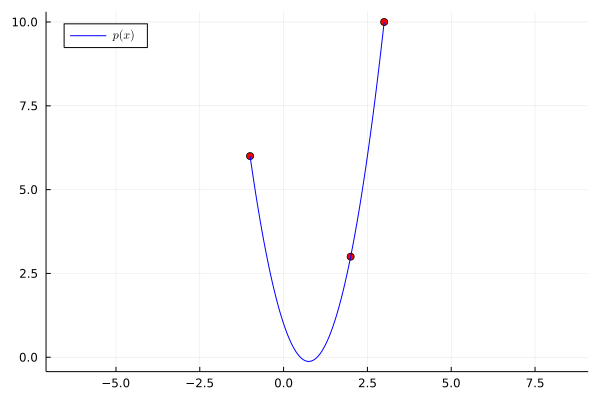

In [4]:
# Tabela de dados
xs = [-1, 2, 3]
ys = [6, 3, 10]
n = length(xs)

# Encontra o polinômio interpolador usando a matriz de Vandermond
A = [ones(n) xs xs.^2]
# Resolve o sistema A coefs = ys
coefs = A \ ys 
# Definie o polinômio, note que vetores de Julia começam no 1
p(x) = coefs[1] + coefs[2]*x + coefs[3]*x^2
@show coefs

# Desenha os dados da tabela e o polinômio
xxs = range(xs[1], xs[end], length = 100)
scatter(xs, ys, color = :red, label = "")
plot!(xxs, p.(xxs), color = :blue, label = L"p(x)", legend = :topleft, ratio = 1)

Perfeito!

Observem que as ideias que nos levaram a resolver esse caso podem ser
naturalmente estendidas para lidar com o caso geral de $n + 1$ pontos na tabela. 
Vamos fazer isso. Considere a tabela

| $x$ | $x_0$ | $x_2$ | $\ldots$ | $x_n$ |
|-----|-------|-------|----------|--------
| $y$ | $y_0$ | $y_2$ | $\ldots$ | $y_n$ |


Podemos tentar encontrar um polinômio de grau $n$  na forma
$$p(x) = c_0 + c_1 x + c_2 x^2 + \ldots + c_{n} x^{n}$$
tal que $p(x_i) = y_i,\ i = 1, 2, \ldots, n$. Para isso escremos o sistema de
equações 
\begin{align*}
c_0 + c_1 x_0 + c_2 x_0^2 + \ldots + c_{n} x_0^{n} &= p(x_0) = y_0\\
c_0 + c_1 x_1 + c_1 x_0^2 + \ldots + c_{n} x_1^{n} &= p(x_1) = y_1\\
\vdots \hspace{3cm} & \hspace{1cm} \vdots\\
c_0 + c_1 x_n + c_2 x_n^2 + \ldots + c_{n} x_n^{n} &= p(x_n) = y_n.\\
\end{align*}
Um sistema linear com  e $n + 1$ equações e $n$ variáveis, os coeficientes 
$c_0, c_1, c_2, \ldots, c_{n}$.

Alternativamente, esse mesmo sistema linear pode se escrito usando a matriz de
Vandermonde
$$\begin{bmatrix}
1 & x_0 & x_0^2 & \ldots & x_0^{n} \\
1 & x_1 & x_1^2 & \ldots & x_1^{n} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_n & x_n^2 & \ldots & x_n^{n} \\
\end{bmatrix} \begin{bmatrix}
c_0 \\
c_1 \\
\vdots \\
c_n
\end{bmatrix} = \begin{bmatrix}
y_0 \\
y_1 \\
\vdots \\
y_n
\end{bmatrix}.$$

Notem que há uma equivalência completa entre o problema de interpolação
polinomial e esse sistema. Se o sistema tiver uma solução, essa solução resolve
o problema de interpolação polinomial e vice versa. 

Resta ainda definir condições que digam quando o sistema acima tem soluções.
Outra pergunta relevante é se a solução será única ou se é possível que existam
múltiplas soluções. Do nosso estudo de álgebra linear, sabemos que a resposta
para essa perguntas estão na matriz de Vandermonde. O problema terá solução
única sempre que a matriz for não singular, ou seja, quando o seu determinante
for não nulo. 

Porém vamos analisar esse problema de exitência e unicidade de soluções por um
outro caminho que irá deixar mais fácil o processo de solução, evitando a
necessidade de se resolver sistemas lineares. Para isso vamos retomar o exemplo
original, baseado na tabela

| $x$ | -1 | 2 | 3 |
|-----|----|---|---|
| $y$ | 6  | 3 |10 |

Ao resolvermos esse problemas tentamos encontrar um polinômio na forma
$$p(x) = c_0 + c_1 x + c_2 x^2,$$
ou seja, fixamos uma base do espaço dos polinômios de grau até 2, $1, x, x^2$ e
buscamos uma combinação linear dos elementos da base para definir o polinômio.
Porque escolher essa base? É a única opção? Não há outras bases mais
interessantes? 

Vamos fazer uma modificação simples na base e ver o que ocorre. Vamos considerar
que queremos escrever o polinômio na forma
$$p(x) = \alpha + \beta (x - 3) + \gamma (x - 3)^2.$$
Claramente qualquer polinômio de grau até 2 pode se escrito nessa forma. Não
estamos perdendo possíveis soluções.

O sistema que temos que resolver, com os coeficientes $\alpha, \beta$ e $\gamma$
como variáveis é
\begin{align*}
\alpha + \beta (-1 - 3) + \gamma (-1 - 3)^2 &= p(-1) = 6\\
\alpha + \beta (2 - 3) + \gamma (2 - 3)^2 &= p(2) = 3 \\
\alpha + \beta (3 - 3) + \gamma (3 - 3)^2 &= p(3) = 10.
\end{align*}
Note que os valores $3 - 3$ se anulam, reduzindo o sistema a
\begin{align*}
&\alpha - 4 \beta + 16 \gamma = 6\\
& \alpha - \beta + \gamma = 3 \\
& \alpha = 10.
\end{align*}
Veja que a vida ficou mais fácil. A última equação já diz o valor da $\alpha$ e
ficamos apenas com um sistema de duas equações e duas variáveis para resolver
\begin{align*}
&- \beta + 4 \gamma = -1\\
& - \beta + \gamma = -7 \\
\end{align*}
Esse sistema tem solução $\beta = 9, \gamma = 2$ (verifique). Assim o polinômio
procurado é
$$p(x) = 10 + 9(x - 3) + 2 (x - 3)^2.$$
Observe que esse polinômio é o mesmo encontrado antes, só que escrito de outra
forma (mais uma vez verifique). Mas não vamos focar nessa questão de unicidade
por enquanto. Vamos tentar entender porque o sistema ficou mais simples.

O segredo foi escolher como base do espaço de polinômios $1, x - 3, (x - 3)^2$
polinômios que se anulam em uma das abicissas $x_2 = 3$. Nesse caso, dois dos
polinômios da base valem zero e isso se reflete no sistema com uma equações mais
simples quando estamos escrevendo $p(x_2) = y_2$. Nesse caso a equação ficou
tão simples que o valor do coeficiente associdao ao polinômio constante $1$
ficou explícito e isso diminuiu o número de variáveis.

Essa parece uma boa ideia. Será que conseguimos ir mais para frente? Será que
conseguimos escolher polinômios que tem a propriedade que eles se anulam na
maior parte dos pontos da tabela? Mais uma vez vamos fazer isso para a nossa
tabela com apenas 3 pontos e depois tentar generalizar para $n$ pontos. 

No exemplo acima, ao escolhermos 3 polinômios no qual dois deles se anulavam no
ponto $x_3$ deixou a equação associada à condição $p(x_2) = y_2$ simples. Vamos
tentar avançar mais nessa ideia. Será que conseguimos três polinômios de grau
até 2, $p_0, p_1, p_2$ tais que $p_1$ e $p_2$ se anulem no $x_0$, de modo a
simplificar a equação associada a $p(x_0) = y_0$, $p_0$ e $p_2$ se anulem no
$x_1$ e $p_0$ e $p_1$ se anulem no $x_2$? Parece complicado, não? 

Esse é o tipo do problema no estilo "ovo de Colombo", ao vermos a solução
dizemos para nós mesmos: "mas era tão simples..." Vejamos polinômios que
funcionam:
\begin{align*}
p_0(x) &= (x - x_1)(x - x_1) & \text{[Se anula em $x_1$ e $x_2$]} \\
p_1(x) &= (x - x_0)(x - x_2) & \text{[Se anula em $x_0$ e $x_2$]} \\
p_2(x) &= (x - x_0)(x - x_1) & \text{[Se anula em $x_0$ e $x_1$]}
\end{align*}
Aí estão exemplos dos polinômios desejados.

Agora que temos três polinômios (de grau até 2) com propriedades que vão
facilitar as contas, vamos tentar resolver o problema de interpolação com um
polinômio geral $p$ que é combinação linear desses
$$p(x) = c_0 p_0(x) + c_1 p_1(x) + c_2 p_2(x).$$
As condições de interpolação para a nossa velha amiga

| $x$ | -1 | 2 | 3 |
|-----|----|---|---|
| $y$ | 6  | 3 |10 |

ficam:
\begin{align*}
c_0 p_0(-1) + c_1 p_1(-1) + c_2 p_2(-1) &= p(-1) =  6 \\
c_0 p_0(2) + c_1 p_1(2) + c_2 p_2(2) &= p(2) =  3 \\
c_0 p_0(3) + c_1 p_1(3) + c_2 p_2(3) &= p(3) =  10.
\end{align*}
Lembrando que os polinômios $p_i$ são feitos para se anular em $x_j, j \neq i$,
o sistema simplifica para
\begin{align*}
c_0 p_0(-1) &=  6 \\
c_1 p_1(2)  &=  3 \\
c_2 p_2(3)  &=  10.
\end{align*}
Ou, em outras palavras:
\begin{align*}
c_0 &=  6 / p_0(-1) \\
c_1 &=  3 / p_1(2) \\
c_2 &=  10 / p_2(3).
\end{align*}
Os coeficientes desejados são obtidos trivialmente.

Será que podemos deixar isso ainda mais fácil? Que tal procurar um polinômio
que, como $p_0$ se anula em $x_1$ e $x_2$ e que também vale $1$ em $x_0$?
Pensando um pouco, chegamos em
$$l^2_0(x) = \frac{(x - x_1)(x - x_2)}{(x_0 - x_1)(x_0 - x_2)}.$$
Este polinômio está bem definido porque as abcissas $x_0$, $x_1$, $x_2$ são
todas distintas. De maneira análoga podemos chegar em variações de $p_1$ que
vale 1 em $x_1$ e de $p_2$ que vale $1$ em $x_2$.
$$l^2_1(x) = \frac{(x - x_0)(x - x_2)}{(x_1 - x_0)(x_1 - x_2)} \quad
\text{e}\quad l^2_2(x) = \frac{(x - x_2)(x - x_1)}{(x_2 - x_0)(x_2 - x_1)}.$$
Vejamos esses polinômios.

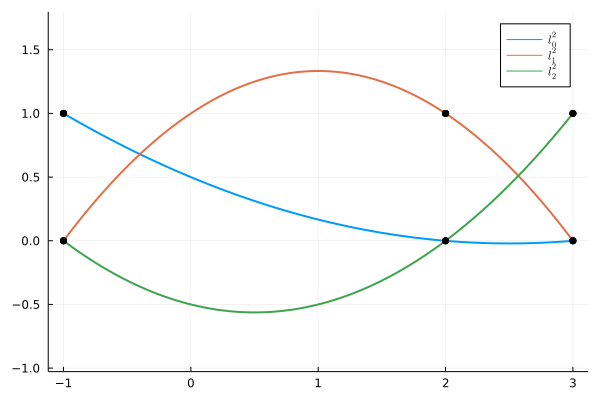

In [5]:
# Lembre que vetore em Julia começam no 1 e não no 0
l20(x) = (x - xs[2])*(x - xs[3]) / (xs[1] - xs[2]) / (xs[1] - xs[3])
l21(x) = (x - xs[1])*(x - xs[3]) / (xs[2] - xs[1]) / (xs[2] - xs[3])
l22(x) = (x - xs[1])*(x - xs[2]) / (xs[3] - xs[1]) / (xs[3] - xs[2])
plot(xxs, l20.(xxs), lw = 2, label = L"l^2_0", ratio = 1)
plot!(xxs, l21.(xxs), lw = 2, label = L"l^2_1")
plot!(xxs, l22.(xxs), lw = 2, label=L"l^2_2")
scatter!([xs xs], [0 0 0 1 1 1], color = :black, label = "")

Esses polinômios especiais são conhecidos como polinômios de Lagrange. Note que
se escrevermos as condições de interpolação do exemplo, partindo de um polinômio
na forma 
$$p(x) = c_0 l^2_0(x) + c_1 l^2_1(x) + c_2 l^2_2(x)$$ 
chegamos às equações
\begin{align*}
c_0 l^2_0(-1) &=  6 \\
c_1 l^2_1(2)  &=  3 \\
c_2 l^2_2(3)  &=  10.
\end{align*}
Como os polinômios $l^2_i$ valem $1$ em $x_i$, isso é ainda mais simples:
\begin{align*}
c_0 &=  6 \\
c_1 &=  3 \\
c_2 &=  10.
\end{align*}
Os coeficientes são os próprios valores presentes na linha $y$ da tabela.

Como generalizar isso? Não é muito difícil, o mais importante é usar a notação
certa para obter expressões simples e compactas. No caso geral recebemos uma
tabela para interpolar _com as abicissas todas distintas_:

| $x$ | $x_0$ | $x_1$ | $\ldots$ | $x_n$ |
|-----|-------|-------|----------|--------
| $y$ | $y_0$ | $y_1$ | $\ldots$ | $y_n$ |

Análogo ao que foi feito para o caso particular, queremos definir polinômios
$l^{n}_i(x), i = 0, 1, ..., n$ tais que:
1. $l^{n}_i(x_j) = 0, j \neq i$
2. $l^{n}_i(x_i) = 1$.

Penando mais um pouco a fórmula geral para os poliômios de Lagrange de grau $n$
é
$$l^n_i(x) = \prod_{\substack{j = 0\\ j \neq i}}^n \frac{x - x_j}{x_i - x_j},\ i
= 0, 1, \ldots, n.$$
Já a fórmula para o polinômio interpolador é
$$p(x) = \sum_{i = 0}^n y_i l^n_i(x).$$

Em particular provamos que a solução do problema de interpolação sempre existe.
Não importa qual seja o lado direito (ou seja o vetor $y$). Isso mostra que
matriz de Vandermonde é não singular. Mostrando que a solução deve ser única
também.

Podemos confirmar isso de outra forma. Considere duas possíveis soluções do
problema de interpolar uma tabela com $n + 1$ entradas, com abicissas todas
distintas, por um polinômio de grau até $n$. Chamemos essas duas soluções de
$p_1$ e $p_2$. Vamos definir o polinômio $q(x) = p_1(x) - p_2(x)$. O que sabemos
sobre ele? Primeiro $q$ é um polinômio de grau até $n$, já que assim são $p_1$ e
$p_2$. Além disso sabemos que
$$q(x_i) = p_1(x_i) - p_2(x_i) = y_i - y_i = 0,\ i = 0, 1, \ldots n.$$
Ou seja, $q$ é um polinômio de grau até $n$ com $n + 1$ raízes distintas! Pelo
teorema fundamental da álgebra $q$ deve ser então o polinômio constante nulo.
Ou, seja, vemos que 
$$ \forall x,\ 0 = q(x) = p_1(x) - p_2(x) \implies \forall x,\ p_1(x) = p_2(x). $$
Ou seja, as duas soluções são a mesma! Note que isso é válido, não importanto
como obtivemos $p_1$ e $p_2$. Um pode ter sido obtido a partir da matriz de
Vandermonde e o outro a partir de polinômios de Lagrange. 

Coroamos toda essa discussão com o seguinte teorema

**Teorema.** Sejam $x_0, x_1, \ldots, x_n \in \mathbb{R}$ $n + 1$ valores todos
distintos e $y_0, y_1, \ldots, y_n \in \mathbb{R}$. Então existe um único
polinômio (interpolador) $p$ tal que
$$p(x_i) = y_i,\ i = 0, 1, \ldots, n.$$
Esse polinômio pode ser obtido resolvendo o sistema baseado na matriz de
Vandermonde ou através dos polinômios de Lagrange. 

## Variações do problema de interpolação

O problema de interpolação polinomial pode aparecer de outras formas na literatura além de pontos e valores funcionais. Uma variante comum e bastante útil é o problema de encontrar um polinômio que passe por alguns valores tabelados, mas também com suas derivadas tabeladas. Por sorte derivadas de polinômios são também polinômios com coeficientes herdados do polinômio original. Assim esse problema tem as mesmas características do problema original e pode ser atacado de forma semelhante. Vamos ver isso, inicialmente, através de um exemplo.

#### Exercício

Dada a tabela

| $x$ |  1 |  2 |
|-----|----|----|
| $y$ |  1 | -2 |
| $y'$| -1 | -7 |

Encontre um polinômio interpolador.

Mais uma vez, é natural pensarmos em usar um polinômio de grau 3, pois mais uma vez teremos quatro coeficientes para determinar e temos quatro condições. Aa fórmulas gerais de um polinômio e sua derivada assim são:
$$
p(x) = c_0 + c_1 x + c_2 x^2 + c_3 x^3,\quad p'(x) = c_1 + 2 c_2 x + 3 c_3 x^2.
$$
Deste modo, as condições descritas pela tabela são
\begin{gather*}
c_0 + c_1 1 + c_2 1^2 + c_3 1^3 = c_0 + c_1 + c_2 + c_3 = p(1) = 1 \\
c_0 + c_1 2 + c_2 2^2 + c_3 2^3 = c_0 + 2 c_1 + 4 c_2 + 8 c_3 = p(2) = -2 \\
c_1 + 2 c_2 1 + 3 c_3 1^2 = c_1 + 2 c_2 + 3 c_3 = p'(1) = -1 \\
c_1 + 2 c_2 2 + 3 c_3 2^2 = c_1 + 4 c_2 + 12 c_3 = p'(1) = -7.
\end{gather*}
Isso pode ser, facilmente, resolvido no computador por 

In [6]:
A = [1 1 1 1
     1 2 4 8
     0 1 2 3
     0 1 4 12]
b = [1, -2, -1, 7]
c = A \ b # Resolve o sistema Ac = b

4-element Vector{Float64}:
 -24.0
  63.0
 -50.0
  12.0

Pronto, o polinômio interpolador é

In [7]:
p(x) = c[1] +c[2]*x + c[3] * x^2 + c[4]*x^3
p′(x) = c[2] + 2*c[3]*x + 3*c[4]*x^2
@show p(1), p(2)
@show p′(1), p′(2);

(p(1), p(2)) = (1.0, -2.0)
(p′(1), p′(2)) = (-1.0, 7.0)


Note que no exemplo acima ainda caimos na situação de resolver um sistema linear. A pergunta natural então passa a ser: tem como evitar isso? Há algo como polinômios de Lagrange para esse tipo de problema? Para isso vejamos um outro exemplo.

#### Exercício

Encontre um polinômio de grau 3 tal que
\begin{align*}
p(-1) = \alpha_0 && p(1) = \alpha_1 \\
p'(-1) = \beta_0 && p'(1) = \beta_1.
\end{align*}
Para isso condire polinômios que são combinações lineares de
$$\frac{(x + 2)(x - 1)^2}{4}, \ 1 - \frac{(x + 2)(x - 1)^2}{4}, \ \frac{(x + 1)(x - 1)^2}{4}, \ \frac{(x + 1)^2(x - 1)}{4}.$$

Vamos começar resolvendo o exerício apresentando p gráfico dessas funções, para ver porque foram escolhidas:

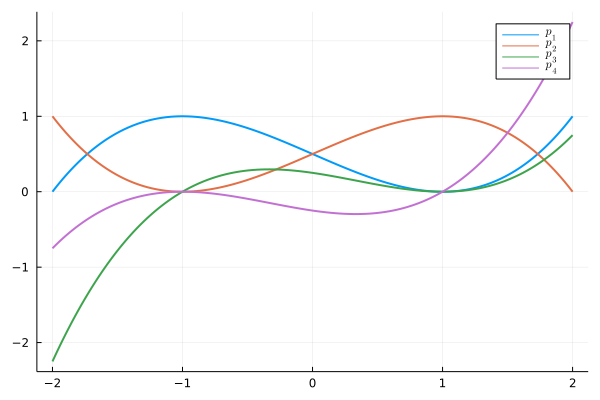

In [8]:
p1(x) = (x + 2)*(x - 1)^2 / 4
p2(x) = 1 - (x + 2)*(x - 1)^2 / 4
p3(x) = (x + 1)*(x - 1)^2 / 4
p4(x) = (x + 1)^2*(x - 1) / 4
xs = range(-2, 2, length=200)
plot(xs, p1.(xs), lw = 2, label = L"p_1")
plot!(xs, p2.(xs), lw = 2, label = L"p_2")
plot!(xs, p3.(xs), lw = 2, label = L"p_3")
plot!(xs, p4.(xs), lw = 2, label = L"p_4")

Bingo! Esses polinômios desempenham um papel semelhante aos polinômios de Lagrange. Por exemplo, podemos ver que o primeiro, $p_1$ é tal que
$$p_1(1) = 1,\ p_1'(-1) = 0,\ p_1(1) = 0,\ p_1'(1) = 0.$$ 
E relações semelhantes são obedecidas pelos outros polinômios. 

Isso sugere que a solução é
$$p(x) = \alpha 0 p_1(x) + \alpha_1 p_2(x) + \beta_0 p_3(x) + \beta_1 p_4(x)$$
Vamos verificar isso numericamente em um caso particular?

In [9]:
α₀, α₁, β₀, β₁ = 1, 2, π, √2
p(x) = α₀*p1(x) + α₁*p2(x) + β₀*p3(x) + β₁*p4(x)
@show p(-1), p(1)
@show ForwardDiff.derivative(p, -1), ForwardDiff.derivative(p, 1);

(p(-1), p(1)) = (1.0, 2.0)
(ForwardDiff.derivative(p, -1), ForwardDiff.derivative(p, 1)) = (3.141592653589793, 1.4142135623730951)


Isso nos ensina que é possível criar, para diferentes variações do problema de interpolação polinômial, diferentes grupos de polinômio que obedecem as seguintes propriedades:

* Todas as condições valem zero neles menos 1.
* Nesse, a condição vale 1.

Com isso, a reolução do problema de interpolação polinomial é simples, basta pegar os valores tabelados.

Agora que já vimos um pouco sobre como resolver o problema de interpolação polinomial. Vamos ver se os resultados que obtemos são úteis. Ou seja, será que usar o polinômio no lugar faz sentido? Será que ajuda? Para isso vamos retomar o exemplo inicial, da função seno. Lembrando a nossa tabela era

| $x$       | $0$ | $\frac{\pi}{4}$      | $\frac{\pi}{3}$      | $\frac{\pi}{2}$ |
| --------- | --- | -------------------- | -------------------- | --------------- |
| $\sin(x)$ | $0$ | $\frac{\sqrt{2}}{2}$ | $\frac{\sqrt{3}}{2}$ | $1$             |

Vamos resolver o problema de interpolação e comparar com os valores reais da função.

In [10]:
# Resolve o problema de interpolacao e testa em um novo ponto dentro do intervalo
xs = [0, π/4, π/3, π/2]
ys = [0, √2 / 2, √3 /2, 1]
A = [ones(size(xs)) xs xs.^2 xs.^3]
coefs = A \ ys
p(x) = coefs[1] + coefs[2]*x + coefs[3]*x^2 + coefs[4]*x^3
@show sin(1), p(1);

(sin(1), p(1)) = (0.8414709848078965, 0.841289120213542)


Nada mal, o polinômio acerta o seno de 1 até a terceira casa. Vamos coparar os gráficos.

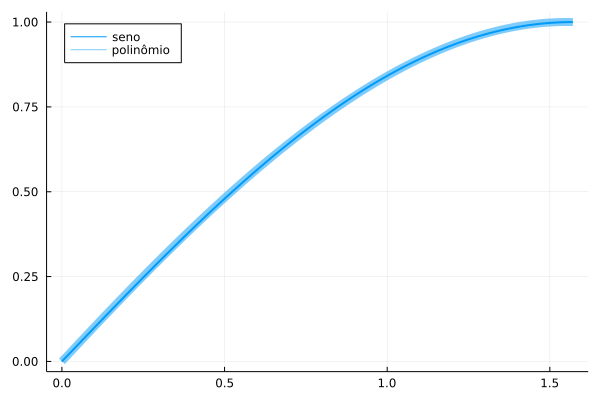

In [11]:
xxs = range(0, π / 2, length=200)
plot(xxs, sin.(xxs), lw=2, label = "seno")
plot!(xxs, p.(xxs), lw=8, color=1, alpha = 0.5, label = "polinômio", legend = :topleft)

Visuamente são quase as mesmas funções! Dá para notar que o seno real não fica sempre no meio da faixa, ou seja há algum erro entre elas, mas a precisão já é bastante interessante.

Agora o que ocorre fora do intervalo de interpolação?

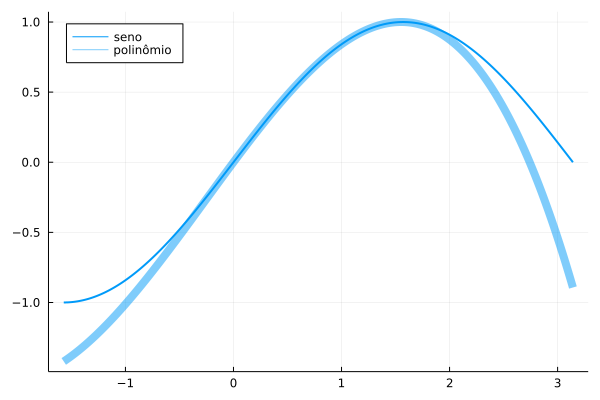

In [12]:
xxs = range(-π / 2, π, length=400)
plot(xxs, sin.(xxs), lw=2, label = "seno")
plot!(xxs, p.(xxs), lw=8, color=1, alpha = 0.5, label = "polinômio", legend = :topleft)

Ops... Fora do intervalo de interpolação não há grande coincidência. E a coisa fica, obviamente ainda mais dramática de aumentarmos ainda mais a faixa.

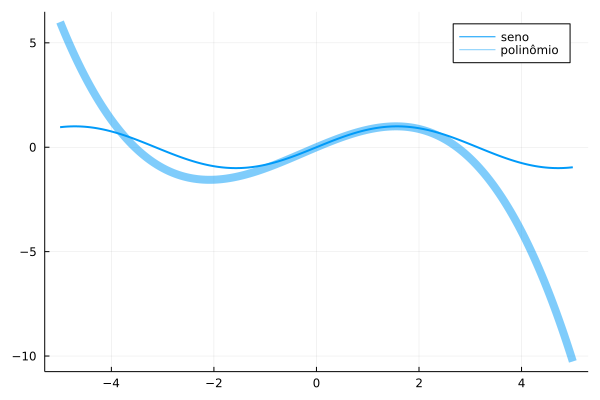

In [13]:
xxs = range(-5, 5, length=400)
plot(xxs, sin.(xxs), lw=2, label = "seno")
plot!(xxs, p.(xxs), lw=8, color=1, alpha = 0.5, label = "polinômio", legend = :topright)